In [5]:
# Fase 1 Recopilacion de los datos
import pandas as pd

# Cargar los datasets
df_train = pd.read_csv("pan12-sexual-predator-identification-training-corpus-2012-05-01.csv")
df_test = pd.read_csv("pan12-sexual-predator-identification-test-corpus-2012-05-17.csv")

# Mostrar las primeras filas de cada uno de los datasets
print("Datos de entrenamiento:")
display(df_train.head())

print("\nDatos de test:")
display(df_test.head())


Datos de entrenamiento:


,autor,mensaje,timestamp
0,97964e7a9e8eb9cf78f2e4d7b2ff34c7,Hola.,03:20
1,0158d0d6781fc4d493f243d4caa49747,hi.,03:20
2,0158d0d6781fc4d493f243d4caa49747,whats up?,03:20
3,97964e7a9e8eb9cf78f2e4d7b2ff34c7,not a ton.,03:20
4,97964e7a9e8eb9cf78f2e4d7b2ff34c7,you?,03:20



Datos de test:


,autor,mensaje,timestamp
0,0a39f78bcb297ab0ebe8a29c28bfed89,bugmail: [Bug 6978] New: Mark eof-terminated s...,15:24
1,60659cfda992013e610f285c46692d28,"Henri, can I ask you a Firefox build question ...",15:32
2,b8810fee2f4a71f849f3f7409546d1d9,"60659cfda992013e610f285c46692d28: sure, but I ...",15:34
3,60659cfda992013e610f285c46692d28,"It appears the build runs through, it creates ...",15:35
4,60659cfda992013e610f285c46692d28,"when I start it, I get my standard install of ...",15:35


In [3]:
# Información general para entender que columnnas tenemos
print("Training:")
print(df_train.info())
print("\nTest:")
print(df_test.info())


Training:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903607 entries, 0 to 903606
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   autor      903607 non-null  object
 1   mensaje    900628 non-null  object
 2   timestamp  903607 non-null  object
dtypes: object(3)
memory usage: 20.7+ MB
None

Test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058781 entries, 0 to 2058780
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   autor      object
 1   mensaje    object
 2   timestamp  object
dtypes: object(3)
memory usage: 47.1+ MB
None


In [ ]:
# Leer archivo con IDs de groomers
with open("pan12-sexual-predator-identification-training-corpus-predators-2012-05-01.txt", "r") as f:
    lista_predators = f.read().splitlines()

# Ver los primeros IDs
print(lista_predators[:10])

['00851429b21722a4d62f63a328c601ca', '00aac10b39157377c79b7700b7b832bf', '02800e11fdb1b43595303709f2b38f8c', '03957f443c7790f9642db14bbc59df11', '04bfa707d3313179ef48177d7270938e', '04d42f7bb1eb41605dea74a8711f9fd0', '0526eb9cfcee11c0036f3fa6d11158d5', '053364a8ce3df76dadd5fe75fb056f72', '0599cd3f7fc15849844468b0702ff593', '0b6b05c740a1bf50ca7f9a461598a3b9']


In [6]:
# Crear columna "clase" con 1 si el autor está en la lista, 0 si no
df_train["clase"] = df_train["autor"].apply(lambda x: 1 if str(x) in lista_predators else 0)

# Verificar que se ha añadido bien
df_train[["autor", "clase"]].head(10)

,autor,clase
0,97964e7a9e8eb9cf78f2e4d7b2ff34c7,0
1,0158d0d6781fc4d493f243d4caa49747,0
2,0158d0d6781fc4d493f243d4caa49747,0
3,97964e7a9e8eb9cf78f2e4d7b2ff34c7,0
4,97964e7a9e8eb9cf78f2e4d7b2ff34c7,0
5,0158d0d6781fc4d493f243d4caa49747,0
6,97964e7a9e8eb9cf78f2e4d7b2ff34c7,0
7,97964e7a9e8eb9cf78f2e4d7b2ff34c7,0
8,0158d0d6781fc4d493f243d4caa49747,0
9,97964e7a9e8eb9cf78f2e4d7b2ff34c7,0


# Fase 2: Preprocesado de los datos

In [6]:
import nltk

# Descargar recursos necesarios
nltk.download('punkt', quiet=True) # punkt: para dividir el texto en palabras.
nltk.download('stopwords', quiet=True) # stopwords: lista de palabras comunes que no aportan mucho (como “el”, “la”, “de”, “que”…).

from nltk.corpus import stopwords
import string




In [7]:
# Lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para limpiar el texto
def limpiar_texto(texto):
    texto = str(texto).lower()
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    tokens = texto.split()
    tokens_filtrados = [word for word in tokens if word not in stop_words]
    return " ".join(tokens_filtrados)


# Aplicar la limpieza al dataset
df_train["mensaje_procesado"] = df_train["mensaje"].apply(limpiar_texto)

# Ver el resultado
df_train[["mensaje", "mensaje_procesado"]].head(10)

,mensaje,mensaje_procesado
0,Hola.,hola
1,hi.,hi
2,whats up?,whats
3,not a ton.,ton
4,you?,
5,same. being lazy. M or f?,lazy f
6,F.,f
7,"Ditto, I&apos;ve done absolutely nothing with ...",ditto iaposve done absolutely nothing day besi...
8,M here. Just got home from weekend trip. Tired.,got home weekend trip tired
9,"Oh, cool. Family thing?",oh cool family thing


# Fase 3 Vectorizar el texto y entrenar el modelo

### Paso 1: Convertir Texto en vectores con TF_IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear vectorizador
vectorizer = TfidfVectorizer(max_features=5000)

# Ajustar y transformar el texto de entrenamiento
X = vectorizer.fit_transform(df_train["mensaje_procesado"])

# Etiquetas
y = df_train["clase"]


### Paso 2: Dividir en entrenamiento y validación

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### PASO 3.1: Entrenar modelo de IA (Naïve Bayes)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Crear y entrenar el modelo
modelo = MultinomialNB()
modelo.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred_nb = modelo.predict(X_val)

# Evaluar
print("Accuracy:", accuracy_score(y_val, y_pred_nb))
print("\nMatriz de confusión:\n", confusion_matrix(y_val, y_pred_nb))
print("\nReporte de clasificación:\n", classification_report(y_val, y_pred_nb))


Accuracy: 0.9549971779860781

Matriz de confusión:
 [[172458     75]
 [  8058    131]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172533
           1       0.64      0.02      0.03      8189

    accuracy                           0.95    180722
   macro avg       0.80      0.51      0.50    180722
weighted avg       0.94      0.95      0.93    180722



### Paso 3.2: Entrenar modelo de IA (Random Forest)


In [ ]:
print("Dimensión de X_train:", X_train.shape)


Dimensión de X_train: (722885, 5000)


In [ ]:
# Seleccionar solo los primeros 10.000 mensajes
X_sub = X_train
y_sub = y_train

from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=50, random_state=42)
modelo_rf.fit(X_sub, y_sub)

# Predecimos sobre el mismo subconjunto
y_pred_rf = modelo_rf.predict(X_val)

# Evaluar el modelo usando el subconjunto correspondiente de y_val
y_val_subset = y_val
print("Random Forest - Accuracy:", accuracy_score(y_val_subset, y_pred_rf))
print("\nMatriz de confusión (Random Forest):\n", confusion_matrix(y_val_subset, y_pred_rf))
print("\nReporte de clasificación (Random Forest):\n", classification_report(y_val_subset, y_pred_rf))



🌲 Random Forest - Accuracy: 0.954366374874116

Matriz de confusión (Random Forest):
 [[172017    516]
 [  7731    458]]

Reporte de clasificación (Random Forest):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172533
           1       0.47      0.06      0.10      8189

    accuracy                           0.95    180722
   macro avg       0.71      0.53      0.54    180722
weighted avg       0.93      0.95      0.94    180722



### Paso 3.3: Entrenar modelo de IA (SVM Support Vector Machine)


In [ ]:
from sklearn.svm import LinearSVC

# Crear el modelo SVM
modelo_svm = LinearSVC()

# Entrenar con los datos
modelo_svm.fit(X_train, y_train)

# Predecir
y_pred_svm = modelo_svm.predict(X_val)

# Evaluar
print("SVM - Accuracy:", accuracy_score(y_val, y_pred_svm))
print("\nMatriz de confusión (SVM):\n", confusion_matrix(y_val, y_pred_svm))
print("\nReporte de clasificación (SVM):\n", classification_report(y_val, y_pred_svm))

🔎 SVM - Accuracy: 0.9551410453624904

Matriz de confusión (SVM):
 [[172461     72]
 [  8035    154]]

Reporte de clasificación (SVM):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172533
           1       0.68      0.02      0.04      8189

    accuracy                           0.96    180722
   macro avg       0.82      0.51      0.51    180722
weighted avg       0.94      0.96      0.93    180722



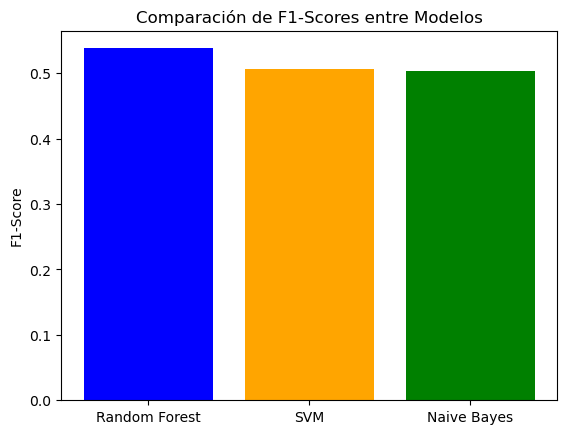

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Resultados de cada modelo
report_rf = classification_report(y_val, y_pred_rf, output_dict=True)
report_svm = classification_report(y_val, y_pred_svm, output_dict=True)
report_nb = classification_report(y_val, y_pred_nb, output_dict=True)

# Extraer F1-score (macro avg) para cada modelo
f1_scores = {
    "Random Forest": report_rf["macro avg"]["f1-score"],
    "SVM": report_svm["macro avg"]["f1-score"],
    "Naive Bayes": report_nb["macro avg"]["f1-score"]
}

# Convertir a DataFrame para facilidad
df_scores = pd.DataFrame(f1_scores.items(), columns=["Modelo", "F1-Score"])

# Visualizar resultados
plt.bar(df_scores["Modelo"], df_scores["F1-Score"], color=['blue', 'orange', 'green'])
plt.ylabel("F1-Score")
plt.title("Comparación de F1-Scores entre Modelos")
plt.show()

# Paso 4: Poner el modelo a prueba con el archivo de test
El archivo test del dataset PAN12, no contiene etiquetas sobre que IDs corresponden a groomers, debido a que este fue diseñado para testear los modelos en una competición, donde las predicciones que se obtenian de este archivo test eran posteriormente revisadas por evaluadores. 

In [26]:
# Aplicar limpieza al test
df_test["mensaje_procesado"] = df_test["mensaje"].apply(limpiar_texto)

# Transformar el texto con el vectorizador TF-IDF ya entrenado
X_test = vectorizer.transform(df_test["mensaje_procesado"])

# Predicción con Naïve Bayes
y_test_nb = modelo.predict(X_test)

# Predicción con SVM
y_test_svm = modelo_svm.predict(X_test)

# Predicción con Random Forest (solo si lo entrenaste con el dataset completo)
y_test_rf = modelo_rf.predict(X_test)



## Opciones de visulización de los resultados
Como se ha mencionado anteriormemte, lo único que podemos hacer es visualizar los resultados de diversas formas para una posterior revisión. 
### Opción 1: Ver ejemplos de mensajes con predicción positiva (posible grooming)

In [28]:
# Añadir predicción del modelo final que elijas (ejemplo: SVM)
df_test["prediccion"] = y_test_svm  # O y_test_nb / y_test_rf

# Ver mensajes sospechosos
df_test[df_test["prediccion"] == 1].sample(20)[["autor", "mensaje", "prediccion"]]


,autor,mensaje,prediccion
1938773,00d36f64d208c95eeb70af477dfb368a,hey sweetie,1
625608,2fa5341dd4b4e7e4682714d632c04e1a,okay hun ;),1
494932,befd81c00fb58b4f4b06e1b70c44ed22,well baby I guess I talk to you tomorrow try t...,1
1042887,e03aa9707bd13f180c517ae1a47e9da2,were u busy tonite?,1
308901,87eb0510ab6472e60cd0927b83efd695,Our chat today has got me thinking... you said...,1
62562,fadde1cb70225e72e78a5836425471f5,your not talkin to me hun,1
1630485,191f7112854f2bc78a73c6496cbfdea1,And his dreams,1
408686,d9a3b807fed99050e9dee44d00c60221,i want to see what they look like hun,1
1615895,3d3760cef49636d3746be30522b4897d,big truck right?,1
1690570,c936ffd9889f3eaca95042f95649ba46,if u want me 2 call leave me ur numbr and ill ...,1


Aquí podemos ver si el modelo está siendo razonable con respecto a resultados reales.

### Opción 2: Contar cuántos usuarios han sido marcados como depredadores

In [31]:
# Usuarios únicos predichos como depredadores
usuarios_marcados = df_test[df_test["prediccion"] == 1]["autor"].nunique()
total_usuarios = df_test["autor"].nunique()

print(f"Usuarios marcados como depredadores: {usuarios_marcados} / {total_usuarios}")


Usuarios marcados como depredadores: 803 / 218702


### Opción 3: Guardar resultados para revisión o análisis posterior

In [ ]:
df_test[["autor", "mensaje", "mensaje_procesado", "prediccion"]].to_csv("resultados_test_sin_etiquetas.csv", index=False)
print("Resultados guardados como 'resultados_test_sin_etiquetas.csv'")

📁 Resultados guardados como 'resultados_test_sin_etiquetas.csv'


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Supongamos que ya tienes estas variables:
# y_val: etiquetas verdaderas
# y_pred_nb, y_pred_svm, y_pred_rf: predicciones de cada modelo

# Calculamos métricas para cada modelo
resultados_modelos = {
    "modelo": [],
    "accuracy": [],
    "recall_clase_1": [],
    "f1_clase_1": []
}

# Naïve Bayes
resultados_modelos["modelo"].append("Naive Bayes")
resultados_modelos["accuracy"].append(accuracy_score(y_val, y_pred_nb))
resultados_modelos["recall_clase_1"].append(recall_score(y_val, y_pred_nb))
resultados_modelos["f1_clase_1"].append(f1_score(y_val, y_pred_nb))

# SVM
resultados_modelos["modelo"].append("SVM")
resultados_modelos["accuracy"].append(accuracy_score(y_val, y_pred_svm))
resultados_modelos["recall_clase_1"].append(recall_score(y_val, y_pred_svm))
resultados_modelos["f1_clase_1"].append(f1_score(y_val, y_pred_svm))

# Random Forest
resultados_modelos["modelo"].append("Random Forest")
resultados_modelos["accuracy"].append(accuracy_score(y_val, y_pred_rf))
resultados_modelos["recall_clase_1"].append(recall_score(y_val, y_pred_rf))
resultados_modelos["f1_clase_1"].append(f1_score(y_val, y_pred_rf))

# Convertimos a DataFrame y guardamos
df_resultados = pd.DataFrame(resultados_modelos)
df_resultados.to_csv("resultados_modelos_basicos.csv", index=False)

print("Resultados guardados en 'resultados_modelos_basicos.csv'")
display(df_resultados)


✅ Resultados guardados en 'resultados_modelos_basicos.csv'


,modelo,accuracy,recall_clase_1,f1_clase_1
0,Naive Bayes,0.954997,0.015997,0.031209
1,SVM,0.955141,0.018806,0.036601
2,Random Forest,0.954366,0.055929,0.099967
